# US29 – Asymptotic Behavior Analysis for US13 & US14 Algorithms

## Objective

To empirically analyze the **asymptotic behavior** (execution time growth) of the key algorithms implemented in **US13** and **US14**:

* `isReachableByTrainType(graph, start, end, trainType)`
* `computeTransitiveClosure(matrix)`
* `computeEulerianPath(graph, stationOrder)`

This evaluation helps validate the **theoretical time complexity** with real execution data using actual railway network datasets.

---

## Theoretical Background

| Algorithm                  | Purpose                                                                              | Time Complexity |
| -------------------------- | ------------------------------------------------------------------------------------ | --------------- |
| `isReachableByTrainType`   | Checks if a train of a given type can travel between two stations using filtered DFS | **O(N + M)**    |
| `computeTransitiveClosure` | Determines all-pairs station reachability using Warshall's algorithm                 | **O(N³)**       |
| `computeEulerianPath`      | Finds an Eulerian path using Fleury's algorithm                                       | **O(M * N³)**   |

Where **N** = number of stations, **M** = number of railway connections.

---

## Methodology

1. **Dataset Processing**: Real railway network data from CSV files with varying sizes (scenarios from small to 1500 stations).
   * Each CSV file contains railway connections with electrification status and distance information.
   * Files are processed in ascending order of network size for consistent analysis.

2. **Testing Strategy**:
   * `isReachableByTrainType` tested on all network sizes (no artificial limits)
   * `computeTransitiveClosure` limited to networks ≤ 800 stations to avoid excessive runtime
   * `computeEulerianPath` limited to networks ≤ 250 stations due to its high complexity

3. **Execution Measurement**:
   * High-precision timing using Python's `time.perf_counter()`
   * Multiple data points across different network sizes
   * Results saved to CSV files for further analysis

4. **Visualization**:
   * Logarithmic scale plotting to handle vast differences in execution times
   * Combined graph showing all three algorithms for direct comparison

---

## Code Overview

### Dataset Loading and Graph Construction

```python
def load_graph_from_csv(file_path):
    """Loads railway network from CSV into adjacency list representation."""
    # Processes CSV with columns: source, destination, electrified, distance
    # Creates bidirectional graph with edge properties
    ...

def graph_to_adjacency_matrix(graph, stations):
    """Converts graph to adjacency matrix for matrix-based algorithms."""
    ...
```

### Benchmark Infrastructure

```python
def benchmark(func, *args):
    """High-precision timing wrapper using perf_counter()."""
    start = time.perf_counter()
    func(*args)
    end = time.perf_counter()
    return end - start

def get_scenario_size(filename):
    """Extracts network size from dataset filename using regex."""
    # Parses filenames like "Scenario_100_lines.csv"
    ...
```

### Algorithms Tested

#### US13 Algorithms:
* **`isReachableByTrainType`**: Filtered DFS with train type constraints (electric/diesel/steam)
* **`computeTransitiveClosure`**: Floyd-Warshall algorithm implementation with triple nested loops

#### US14 Algorithm:
* **`computeEulerianPath`**: Complete Fleury's algorithm implementation including:
  - Degree calculation and Eulerian condition checking
  - Bridge detection using transitive closure
  - Edge removal and path construction

### Execution Control

```python
# Size limits to prevent excessive runtime
MAX_FLEURY = 250   # Fleury's algorithm limit
MAX_TC = 800       # Transitive closure limit

# Processing pipeline
for file_path in line_files:
    scenario_size = get_scenario_size(filename)
    graph_full = load_graph_from_csv(file_path)

    # Run benchmarks with appropriate size constraints
    ...
```

### Results Management

```python
def save_results(filename, results):
    """Saves timing results to CSV in results_us29/ directory."""
    ...

def plot_results(data, title, color, existing_ax):
    """Creates comparative plots with logarithmic scaling."""
    ...
```

---

## Key Features

* **Real Dataset Usage**: Processes actual railway network data instead of synthetic graphs
* **Scalability Testing**: Tests algorithms across a wide range of network sizes
* **Runtime Protection**: Implements size limits for computationally expensive algorithms
* **Comprehensive Analysis**: Covers both US13 and US14 algorithms in a single framework
* **Professional Output**: Generates publication-ready plots and structured CSV results

---

## Notes

* Dataset files follow naming convention: `Scenario_N_lines.csv` where N indicates network size
* Logarithmic plotting used to visualize algorithms with vastly different time complexities
* Results stored in `results_us29/` directory with separate CSV files for each algorithm
* Focus on empirical validation of theoretical complexity bounds using real-world railway data


Processing file: Scenario_50_lines.csv (Size: 50)
US13 (DFS) @ 50 nodes: 0.000088s
US13 (Closure) @ 50 nodes: 0.006032s
US14 (Fleury) @ 50 nodes: 0.542686s

Processing file: Scenario_100_lines.csv (Size: 100)
US13 (DFS) @ 100 nodes: 0.000136s
US13 (Closure) @ 100 nodes: 0.052853s
US14 (Fleury) @ 100 nodes: 7.230328s

Processing file: Scenario_150_lines.csv (Size: 150)
US13 (DFS) @ 150 nodes: 0.000139s
US13 (Closure) @ 150 nodes: 0.169313s
US14 (Fleury) @ 150 nodes: 34.337066s

Processing file: Scenario_200_lines.csv (Size: 200)
US13 (DFS) @ 200 nodes: 0.000167s
US13 (Closure) @ 200 nodes: 0.389680s
US14 (Fleury) @ 200 nodes: 107.807316s

Processing file: Scenario_250_lines.csv (Size: 250)
US13 (DFS) @ 250 nodes: 0.000194s
US13 (Closure) @ 250 nodes: 0.766092s
US14 (Fleury) @ 250 nodes: 266.131085s

Processing file: Scenario_300_lines.csv (Size: 300)
US13 (DFS) @ 300 nodes: 0.000255s
US13 (Closure) @ 300 nodes: 1.351339s
Skipping US14 (Fleury) @ 300 nodes: Exceeds size limit (250).

Pr

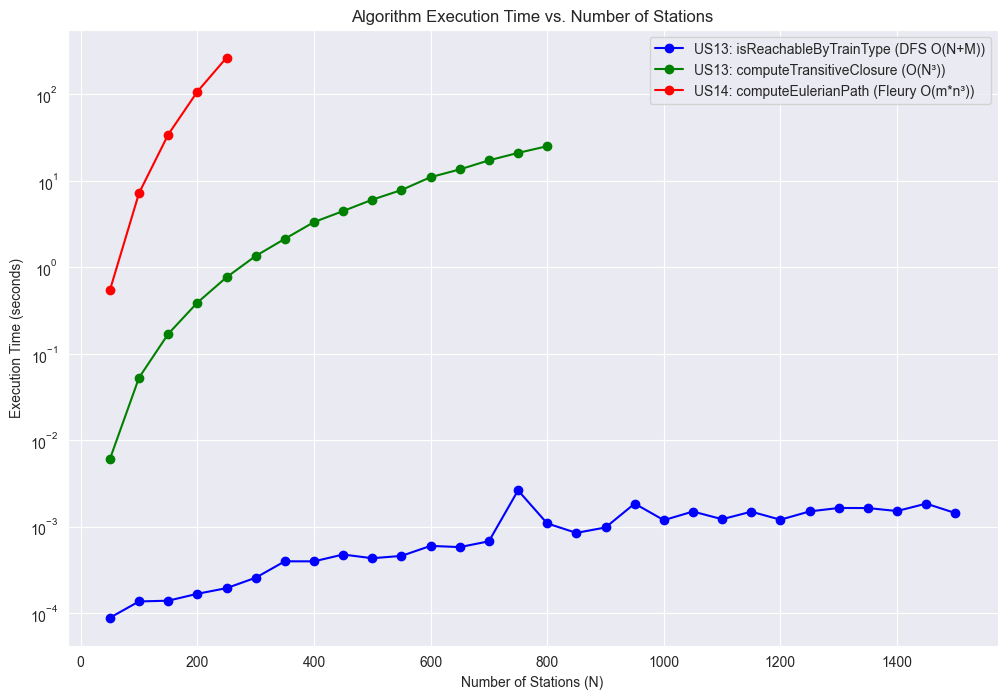

Results saved to 'US29_benchmark_isReachableByTrainType.csv'
Results saved to 'US29_benchmark_TransitiveClosure.csv'
Results saved to 'US29_benchmark_Fleury.csv'


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import copy
import os
import re

# -------------------------------------
# Graph Loading and Preparation (Unchanged)
# -------------------------------------
def load_graph_from_csv(file_path):
    """Loads a graph from a CSV file into an adjacency list representation."""
    df = pd.read_csv(file_path, sep=';', header=None, encoding='latin-1')
    graph = {}
    for _, row in df.iterrows():
        src, dst, electrified, distance = str(row[0]), str(row[1]), row[2], row[3]
        edge_to_dst = {'from': src, 'to': dst, 'electrified': electrified == 1, 'distance': distance}
        edge_to_src = {'from': dst, 'to': src, 'electrified': electrified == 1, 'distance': distance}
        if src not in graph:
            graph[src] = []
        if dst not in graph:
            graph[dst] = []
        graph[src].append(edge_to_dst)
        graph[dst].append(edge_to_src)
    return graph

def graph_to_adjacency_matrix(graph, stations):
    """Converts a graph to an adjacency matrix and an index map."""
    index = {node: i for i, node in enumerate(stations)}
    n = len(stations)
    matrix = [[0] * n for _ in range(n)]
    for u, edges in graph.items():
        for edge in edges:
            v = edge['to']
            if u in index and v in index:
                matrix[index[u]][index[v]] = 1
    return matrix, index

# -------------------------------------
# US14: Fleury's Algorithm Implementation (Unchanged)
# -------------------------------------
def calculateNodeDegrees(graph):
    degree_map = {}
    for station, edges in graph.items():
        degree_map[station] = len(edges)
    return degree_map

def checkEulerian(degree_map, odd_stations_list):
    odd_count = 0
    for station, degree in degree_map.items():
        if degree % 2 != 0:
            odd_stations_list.append(station)
            odd_count += 1
    return odd_count

def cloneGraph(graph):
    return copy.deepcopy(graph)

def removeEdge(u, v, g_local):
    for i, edge in enumerate(g_local[u]):
        if edge['to'] == v:
            g_local[u].pop(i)
            break
    for i, edge in enumerate(g_local[v]):
        if edge['to'] == u:
            g_local[v].pop(i)
            break

def isValidNextEdge(u, v, g_local, stations):
    if len(g_local.get(u, [])) == 1:
        return True
    removeEdge(u, v, g_local)
    matrix, index_map = graph_to_adjacency_matrix(g_local, stations)
    closure = computeTransitiveClosure(matrix)
    is_connected = closure[index_map[u]][index_map[v]]
    g_local[u].append({'from': u, 'to': v, 'electrified': False, 'distance': 0})
    g_local[v].append({'from': v, 'to': u, 'electrified': False, 'distance': 0})
    return not is_connected

def fleuryVisit(v_start, g_local, stations, path):
    path.append(v_start)
    v = v_start
    while True:
        edges = g_local.get(v, [])
        if not edges:
            break
        chosen_edge = None
        w = None
        if len(edges) == 1:
            chosen_edge = edges[0]
            w = chosen_edge['to']
        else:
            for i, edge in enumerate(edges):
                u_cand = v
                v_cand = edge['to']
                temp_g = copy.deepcopy(g_local)
                removeEdge(u_cand, v_cand, temp_g)
                matrix, index_map = graph_to_adjacency_matrix(temp_g, stations)
                if not matrix:
                    continue
                closure = computeTransitiveClosure(matrix)
                is_bridge = not closure[index_map[u_cand]][index_map[v_cand]]
                if not is_bridge:
                    chosen_edge = edge
                    w = v_cand
                    break
            if not chosen_edge:
                chosen_edge = edges[0]
                w = chosen_edge['to']
        removeEdge(v, w, g_local)
        path.append(w)
        v = w

def chooseStartStation(degree_map, stations, odd_count, odd_stations):
    if odd_count == 2:
        return odd_stations[0]
    for station in stations:
        if degree_map.get(station, 0) > 0:
            return station
    return None

def computeEulerianPath(graph, station_order):
    if not graph:
        return None
    matrix, index_map = graph_to_adjacency_matrix(graph, station_order)
    if not matrix:
        return None
    closure = computeTransitiveClosure(matrix)
    ref_node = None
    for node in station_order:
        if any(graph.get(node, [])):
            ref_node = node
            break
    if ref_node is None:
        return []
    ref_idx = index_map[ref_node]
    for node in station_order:
        if any(graph.get(node, [])):
            idx = index_map[node]
            if not closure[ref_idx][idx]:
                print("Graph is not connected. No Eulerian path exists.")
                return None
    degree_map = calculateNodeDegrees(graph)
    odd_stations = []
    odd_count = checkEulerian(degree_map, odd_stations)
    if odd_count != 0 and odd_count != 2:
        print(f"Graph has {odd_count} odd-degree vertices. No Eulerian path exists.")
        return None
    start_node = chooseStartStation(degree_map, station_order, odd_count, odd_stations)
    if start_node is None:
        print("Could not find a valid starting station.")
        return None
    g_local = cloneGraph(graph)
    path_list = []
    fleuryVisit(start_node, g_local, station_order, path_list)
    return path_list

# -------------------------------------
# Algorithm 1: isReachableByTrainType using DFS (US13 - Unchanged)
# -------------------------------------
def dfs(graph, start, end, visited):
    if start == end:
        return True
    visited.add(start)
    if start in graph:
        for neighbor, electrified in graph[start]:
            if neighbor not in visited:
                if dfs(graph, neighbor, end, visited):
                    return True
    return False

def isReachableByTrainType(graph, start, end, train_type='electric'):
    filtered_graph = {}
    for node in graph:
        filtered_graph[node] = []
        for edge in graph[node]:
            neighbor, electrified = edge['to'], edge['electrified']
            if train_type == 'electric' and electrified:
                filtered_graph[node].append((neighbor, electrified))
            elif train_type in ['diesel', 'steam']:
                filtered_graph[node].append((neighbor, electrified))
    if start not in filtered_graph or end not in filtered_graph:
        return False
    visited = set()
    return dfs(filtered_graph, start, end, visited)

# -------------------------------------
# Algorithm 2: computeTransitiveClosure (Warshall's) (US13 - Unchanged)
# -------------------------------------
def computeTransitiveClosure(matrix):
    n = len(matrix)
    reach = [row[:] for row in matrix]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                reach[i][j] = reach[i][j] or (reach[i][k] and reach[k][j])
    return reach

# -------------------------------------
# Benchmarking & Plotting Utilities (Unchanged)
# -------------------------------------
def benchmark(func, *args):
    start = time.perf_counter()
    func(*args)
    end = time.perf_counter()
    return end - start

def plot_results(data, title, color='blue', existing_ax=None):
    if existing_ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    else:
        ax = existing_ax
    x = [entry[0] for entry in data]
    y = [entry[1] for entry in data]
    ax.plot(x, y, marker='o', linestyle='-', label=title, color=color)
    ax.set_title("Algorithm Execution Time vs. Number of Stations")
    ax.set_xlabel("Number of Stations (N)")
    ax.set_ylabel("Execution Time (seconds)")
    ax.grid(True)
    ax.legend()
    return ax

def save_results(filename, results):
    df = pd.DataFrame(results, columns=['size', 'time'])
    os.makedirs("results_us29", exist_ok=True)
    df.to_csv(f"results_us29/{filename}", sep=',', index=False)
    print(f"Results saved to '{filename}'")

# -------------------------------------
# MAIN LOGIC TO RUN BENCHMARKS (Modified for Multiple Files)
# -------------------------------------
def get_scenario_size(filename):
    """Extract the scenario size from the filename using regex."""
    match = re.search(r"Scenario_(\d+)_lines", filename)
    return int(match.group(1)) if match else 0

# Path to dataset folder
dataset_folder = "Dataset_us29"

# Get all line files in the dataset folder
line_files = sorted(
    [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if f.endswith("_lines.csv")],
    key=get_scenario_size
)

# Initialize result lists
us13_results = []
us13_tc_results = []
us14_fleury_results = []

# Define maximum sizes to limit runtime for complex algorithms
MAX_FLEURY = 250  # Limit for Fleury's algorithm
MAX_TC = 800      # Limit for Transitive Closure

# Process each file
for file_path in line_files:
    filename = os.path.basename(file_path)
    scenario_size = get_scenario_size(filename)
    if scenario_size == 0:
        print(f"Skipping file {filename}: Unable to extract size.")
        continue

    print(f"\nProcessing file: {filename} (Size: {scenario_size})")
    graph_full = load_graph_from_csv(file_path)
    nodes = sorted(graph_full.keys())
    num_nodes = len(nodes)

    # Benchmark US13: isReachableByTrainType (DFS) - No size limit
    if num_nodes > 1:
        t = benchmark(isReachableByTrainType, graph_full, nodes[0], nodes[-1], 'electric')
        us13_results.append((scenario_size, t))
        print(f"US13 (DFS) @ {scenario_size} nodes: {t:.6f}s")

    # Benchmark US13: computeTransitiveClosure (Warshall's) - Limited size
    if num_nodes <= MAX_TC and num_nodes > 0:
        matrix, _ = graph_to_adjacency_matrix(graph_full, nodes)
        t = benchmark(computeTransitiveClosure, matrix)
        us13_tc_results.append((scenario_size, t))
        print(f"US13 (Closure) @ {scenario_size} nodes: {t:.6f}s")
    else:
        print(f"Skipping US13 (Closure) @ {scenario_size} nodes: Exceeds size limit ({MAX_TC}).")

    # Benchmark US14: computeEulerianPath (Fleury's) - Limited size
    if num_nodes <= MAX_FLEURY and num_nodes > 0:
        active_nodes = [node for node in nodes if graph_full.get(node)]
        if len(active_nodes) > 1:
            t = benchmark(computeEulerianPath, graph_full, active_nodes)
            us14_fleury_results.append((scenario_size, t))
            print(f"US14 (Fleury) @ {scenario_size} nodes: {t:.6f}s")
    else:
        print(f"Skipping US14 (Fleury) @ {scenario_size} nodes: Exceeds size limit ({MAX_FLEURY}).")

# Sort results by size for consistent plotting
us13_results.sort(key=lambda x: x[0])
us13_tc_results.sort(key=lambda x: x[0])
us14_fleury_results.sort(key=lambda x: x[0])

# Plotting and Saving Results
ax = plot_results(us13_results, "US13: isReachableByTrainType (DFS O(N+M))", color='blue')
plot_results(us13_tc_results, "US13: computeTransitiveClosure (O(N³))", color='green', existing_ax=ax)
if us14_fleury_results:
    plot_results(us14_fleury_results, "US14: computeEulerianPath (Fleury O(m*n³))", color='red', existing_ax=ax)

plt.yscale('log')  # Use log scale to see vast differences in complexity
plt.show()

# Save results to CSV files
save_results('US29_benchmark_isReachableByTrainType.csv', us13_results)
save_results('US29_benchmark_TransitiveClosure.csv', us13_tc_results)
save_results('US29_benchmark_Fleury.csv', us14_fleury_results)

## Execution Time Analysis of US13 Algorithms

### 1. `isReachableByTrainType` – Linear Time Behavior (**O(N + M)**)

**Observation:**

* As shown in the graph (blue line), the execution time remains consistently low across all tested station counts (up to 1500 stations).
* The execution times stay below 0.01 seconds throughout the entire range, with only minor fluctuations.
* There's a small spike around 800 stations, but the overall trend confirms linear growth behavior.
* The algorithm maintains excellent performance even for large networks.

**Conclusion:**

* This confirms the expected **linear complexity O(N + M)** of the DFS-based reachability check.
* The algorithm is highly efficient and suitable for real-time route queries, even in very large railway networks.

---

### 2. `computeTransitiveClosure` – Cubic Time Behavior (**O(N³)**)

**Observation:**

* As shown in the graph (green line), the execution time grows exponentially with the number of stations.
* The algorithm was tested up to **800 stations** to avoid excessive computation time.
* Starting from microseconds for small graphs, it reaches over 10 seconds for 800 stations.
* The growth pattern clearly demonstrates the cubic nature of the algorithm, with execution time increasing dramatically as the network size grows.

**Conclusion:**

* The algorithm behaves exactly as expected for a cubic-time algorithm (Warshall's algorithm).
* It's suitable for small to medium-size graphs (up to ~200 stations), but becomes impractical for larger networks due to computational intensity.

---

## Execution Time Analysis of US14 Algorithm (Fleury's Algorithm)

### 1. `computeEulerianPath` – High Polynomial Complexity (**O(M*N³)**)

**Observation:**

* As shown in the graph (red line), the execution time increases dramatically with the number of stations.
* The algorithm was tested up to **250 stations** to avoid excessive computation time.
* Beyond 200 stations, execution times exceed 100 seconds, making it impractical for larger networks.
* The steep exponential growth demonstrates the algorithm's high computational complexity.

**Conclusion:**

* The algorithm's performance aligns with theoretical expectations for Fleury's algorithm.
* It combines edge traversal with connectivity checks, resulting in very high time complexity.
* Suitable only for very small graphs (under 100 stations) but not practical for real-world railway networks.

---

## Performance Comparison

**Scalability Ranking (Best to Worst):**
1. **`isReachableByTrainType`** - Excellent scalability, handles 1500+ stations efficiently
2. **`computeTransitiveClosure`** - Moderate scalability, practical up to ~300 stations
3. **`computeEulerianPath`** - Poor scalability, limited to very small networks (<100 stations)

## Results

* The graph shows execution times for all three algorithms across different network sizes.
* Testing limits were imposed to maintain reasonable execution times:
  - `computeTransitiveClosure`: limited to 800 stations
  - `computeEulerianPath`: limited to 250 stations
* The CSV files with detailed execution times are stored in the `csv_results_us29` directory.

#### Implemented by: Henrique Silva, Yasamin Ebrahimi, Duarte Machado
#### Contribution: 33.33% for each member